## Kernel in Logistic Regression

Define our kernel function. For the logistic regression, we are going to use the linear kernel.

In [1]:
import numpy as np

# x:samples to be converted
# y:all the training data 
def compute_linear_kernel(x, y):
    return x.dot(y.T)

In [2]:
from sklearn.datasets import load_iris
# Get iris data and convert it to binary data
data = load_iris()
X = data.data
y_categorical = data.target
y = np.array([1 if label==1 else 0 for label in y_categorical])

In [3]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression

kf = StratifiedKFold(n_splits=5)

for i, (train_index, test_index) in enumerate(kf.split(X,y)):
    # get train and test set
    X_train=X[train_index]
    y_train=y[train_index]
    X_test=X[test_index]
    y_test=y[test_index]
    # convert data to kernel data
    X_train_kernel = compute_linear_kernel(X_train, X_train)
    X_test_kernel = compute_linear_kernel(X_test, X_train)
    # build a logistic regression 
    clf = LogisticRegression()
    clf.fit(X_train_kernel, y_train)
    # do prediction and report metrics
    y_pred = clf.predict(X_test_kernel)
    y_true = y_test
    print('{} fold, confusion matrix=\n{}, \nprecision={}, recall={}, f1_score={}, accuracy={}\n'
          .format(i + 1,
                  confusion_matrix(y_true, y_pred), 
                  precision_score(y_true, y_pred), 
                  recall_score(y_true, y_pred), 
                  f1_score(y_true, y_pred),
                  accuracy_score(y_true, y_pred)))

1 fold, confusion matrix=
[[20  0]
 [ 8  2]], 
precision=1.0, recall=0.2, f1_score=0.33333333333333337, accuracy=0.7333333333333333

2 fold, confusion matrix=
[[20  0]
 [ 5  5]], 
precision=1.0, recall=0.5, f1_score=0.6666666666666666, accuracy=0.8333333333333334

3 fold, confusion matrix=
[[17  3]
 [ 6  4]], 
precision=0.5714285714285714, recall=0.4, f1_score=0.47058823529411764, accuracy=0.7

4 fold, confusion matrix=
[[12  8]
 [ 3  7]], 
precision=0.4666666666666667, recall=0.7, f1_score=0.56, accuracy=0.6333333333333333

5 fold, confusion matrix=
[[15  5]
 [ 7  3]], 
precision=0.375, recall=0.3, f1_score=0.33333333333333326, accuracy=0.6



## Kernel Visualization

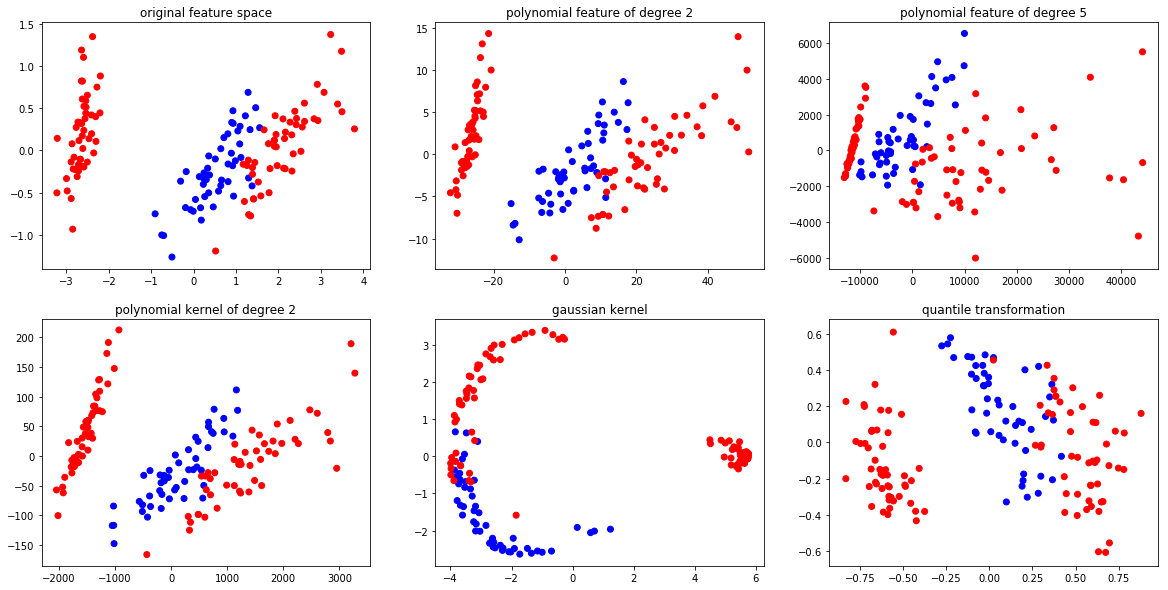

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics.pairwise import polynomial_kernel
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.preprocessing import QuantileTransformer

fig, ax_arr = plt.subplots(2, 3, figsize=((20, 10)))
colors = ['blue' if label==1 else 'red' for label in y]
# original
X_PCA = PCA(n_components=2).fit_transform(X)
ax_arr[0][0].scatter(X_PCA[:,0], X_PCA[:,1],  c=colors)
ax_arr[0][0].set_title('original feature space')

# polynomial feature of degree 2
X_trans = PolynomialFeatures(2).fit_transform(X)
X_PCA = PCA(n_components=2).fit_transform(X_trans)
ax_arr[0][1].scatter(X_PCA[:,0], X_PCA[:,1],  c=colors)
ax_arr[0][1].set_title('polynomial feature of degree 2')

# polynomial feature of degree 5
X_trans = PolynomialFeatures(5).fit_transform(X)
X_PCA = PCA(n_components=2).fit_transform(X_trans)
ax_arr[0][2].scatter(X_PCA[:,0], X_PCA[:,1],  c=colors)
ax_arr[0][2].set_title('polynomial feature of degree 5')

# polynomial kernel of degree 2
X_trans = polynomial_kernel(X, degree=2)
X_PCA = PCA(n_components=2).fit_transform(X_trans)
ax_arr[1][0].scatter(X_PCA[:,0], X_PCA[:,1],  c=colors)
ax_arr[1][0].set_title('polynomial kernel of degree 2')

# gaussian kernel
X_trans = rbf_kernel(X)
X_PCA = PCA(n_components=2).fit_transform(X_trans)
ax_arr[1][1].scatter(X_PCA[:,0], X_PCA[:,1],  c=colors)
ax_arr[1][1].set_title('gaussian kernel')

# quantile transformation
X_trans = QuantileTransformer().fit_transform(X)
X_PCA = PCA(n_components=2).fit_transform(X_trans)
ax_arr[1][2].scatter(X_PCA[:,0], X_PCA[:,1],  c=colors)
ax_arr[1][2].set_title('quantile transformation')
plt.show()

## Tuning K-Means

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

optimal_params = []
# original data
silhouette_avgs = []
cluster_centers_list = []
label_list = []
for k in range(2, 10):
    # fit the k-means cluster
    kmeans = KMeans(n_clusters=k).fit(X)
    # get labels
    labels = kmeans.labels_
    # append to label_list in order to retrieve the optimal labels after tuning
    label_list.append(labels)
    # compute silhouette score
    silhouette_avg = silhouette_score(X, labels)
    silhouette_avgs.append(silhouette_avg)
    cluster_centers_list.append(kmeans.cluster_centers_)
# sort silhouette score to get the index of the maximum
max_silhouette_index = np.argsort(silhouette_avgs)[-1]
optimal_k = list(range(2, 10))[max_silhouette_index]
print('For original data, optimal k is', optimal_k)
# append data for plots
optimal_labels = label_list[max_silhouette_index]
optimal_centers = cluster_centers_list[max_silhouette_index]
optimal_params.append((optimal_k, optimal_labels, optimal_centers))

# the polynomial feature of degree 2
X_trans_2 = PolynomialFeatures(2).fit_transform(X)
silhouette_avgs = []
cluster_centers_list = []
label_list = []
for k in range(2, 10):
    # fit the k-means cluster
    kmeans = KMeans(n_clusters=k).fit(X_trans_2)
    # get labels
    labels = kmeans.labels_
    # append to label_list in order to retrieve the optimal labels after tuning
    label_list.append(labels)
    silhouette_avg = silhouette_score(X_trans_2, labels)
    silhouette_avgs.append(silhouette_avg)
    cluster_centers_list.append(kmeans.cluster_centers_)

max_silhouette_index = np.argsort(silhouette_avgs)[-1]
optimal_k = list(range(2, 10))[max_silhouette_index]
print('For the polynomial feature with degree 2, optimal k is', optimal_k)
optimal_labels = label_list[max_silhouette_index]
optimal_centers = cluster_centers_list[max_silhouette_index]
optimal_params.append((optimal_k, optimal_labels, optimal_centers))

# the polynomial feature of degree 3
X_trans_3 = PolynomialFeatures(3).fit_transform(X)
silhouette_avgs = []
cluster_centers_list = []
label_list = []
for k in range(2, 10):
    # fit the k-means cluster
    kmeans = KMeans(n_clusters=k).fit(X_trans_3)
    # get labels
    labels = kmeans.labels_
    # append to label_list in order to retrieve the optimal labels after tuning
    label_list.append(labels)
    silhouette_avg = silhouette_score(X_trans_3, labels)
    silhouette_avgs.append(silhouette_avg)
    cluster_centers_list.append(kmeans.cluster_centers_)

max_silhouette_index = np.argsort(silhouette_avgs)[-1]
optimal_k = list(range(2, 10))[max_silhouette_index]
print('For the polynomial feature with degree 3, optimal k is', optimal_k)
optimal_labels = label_list[max_silhouette_index]
optimal_centers = cluster_centers_list[max_silhouette_index]
optimal_params.append((optimal_k, optimal_labels, optimal_centers))

For original data, optimal k is 2
For the polynomial feature with degree 2, optimal k is 2
For the polynomial feature with degree 3, optimal k is 2


plot the clustering

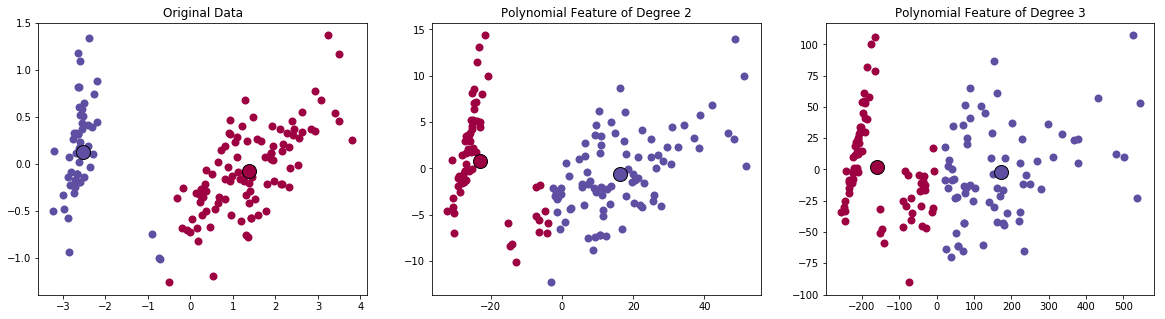

In [7]:
fig, ax_arr = plt.subplots(1, 3, figsize=((20, 5)))
# original data
pca = PCA(n_components=2)
X_PCA = pca.fit_transform(X)
centers = optimal_params[0][2]
centers_PCA = pca.transform(centers)
labels = optimal_params[0][1]
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, color in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = X_PCA[class_member_mask]
    ax_arr[0].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(color),
                   markeredgewidth=0, markersize=8)
    center_point = centers_PCA[k]
    ax_arr[0].plot(center_point[0], center_point[1], 'o', markerfacecolor=tuple(color),
             markeredgecolor='k', markersize=14)
    ax_arr[0].set_title('Original Data')

# the polynomial feature of degree 2
pca = PCA(n_components=2)
X_PCA = pca.fit_transform(X_trans_2)
centers = optimal_params[1][2]
centers_PCA = pca.transform(centers)
labels = optimal_params[1][1]
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, color in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = X_PCA[class_member_mask]
    ax_arr[1].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(color), 
                   markeredgewidth=0, markersize=8)
    center_point = centers_PCA[k]
    ax_arr[1].plot(center_point[0], center_point[1], 'o', markerfacecolor=tuple(color),
                   markeredgecolor='k', markersize=14)
    ax_arr[1].set_title('Polynomial Feature of Degree 2')
    
# the polynomial feature of degree 3
pca = PCA(n_components=2)
X_PCA = pca.fit_transform(X_trans_3)
centers = optimal_params[2][2]
centers_PCA = pca.transform(centers)
labels = optimal_params[2][1]
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, color in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = X_PCA[class_member_mask]
    ax_arr[2].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(color),
                   markeredgewidth=0, markersize=8)
    center_point = centers_PCA[k]
    ax_arr[2].plot(center_point[0], center_point[1], 'o', markerfacecolor=tuple(color),
             markeredgecolor='k', markersize=14)
    ax_arr[2].set_title('Polynomial Feature of Degree 3')
plt.show()

## Oversampling an unbalanced data by Gaussian Mixture

Notice: Oversampling needs to be applied on training data rather than validation and test data. Since this question is just to design the oversampling procedure not for training a model, we use all the iris binary data.

In [10]:
from collections import Counter
from sklearn.mixture import GaussianMixture
from sklearn.metrics.pairwise import euclidean_distances

# count each class
counter = Counter(y)
unique_labels = list(counter.keys())
# compute the sample number of oversampling for each class
original_sample_num = list(counter.values())
sample_max_num = np.max(original_sample_num)
sample_num = [sample_max_num - x for x in original_sample_num]
X_resampled_list = []
y_resampled_list = []
for i, label in enumerate(unique_labels):
    sample_n = sample_num[i]
    # get features for the minority class to fit the Gaussian Mixture
    X_to_fit = X[y==label]
    y_to_fit = y[y==label]
    # if current class is the majority class, 
    # add original features and labels, then skip
    if sample_n == 0:
        X_resampled_list.append(X_to_fit)
        y_resampled_list.append(y_to_fit)
        continue
    # tune the Gaussian Mixture Model using information-theoretic criteria (BIC)
    lowest_bic = np.infty
    bic = []
    # number of components
    n_components_range = range(1, 5)
    # covariance type
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = GaussianMixture(n_components=n_components,
                                  covariance_type=cv_type)
            gmm.fit(X_to_fit)
            bic.append(gmm.bic(X))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm
    # sampling sample_n samples from the best Gaussian Mixture
    for j in range(sample_n):
        # set the initial distance to minimal distance
        min_distance = 0.01
        # sample data and de-duplicates
        while min_distance <= 0.01:
            # sample 1 data from GMM
            X_resample, _ = best_gmm.sample(1)
            y_resample = np.array([label])
            # compute euclidean distances 
            # between the new sample with all existing resamples
            # including original data points
            distances = euclidean_distances(X_resample, X_to_fit)
            # get the minimal distance
            min_distance = np.min(distances)
        # after the new sample is min_distance further than any existing re-samples
        # update resample set
        X_to_fit = np.append(X_to_fit, X_resample, axis=0)
        y_to_fit = np.append(y_to_fit, y_resample, axis=0)
    # after reach the sample number, append the re-samples
    X_resampled_list.append(X_to_fit)
    y_resampled_list.append(y_to_fit)
# concatenate all re-samples
X_resampled = np.concatenate(X_resampled_list, axis=0)
y_resampled = np.concatenate(y_resampled_list, axis=0)
print("resample feature data shape", X_resampled.shape)
print("resample data class count", Counter(y_resampled))

resample feature data shape (200, 4)
resample data class count Counter({0: 100, 1: 100})


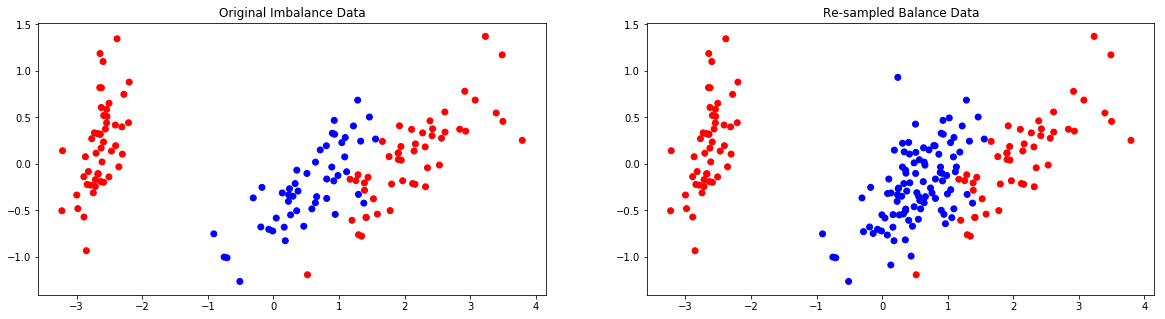

In [12]:
fig, ax_arr = plt.subplots(1, 2, figsize=((20, 5)))
# original
colors_original = ['blue' if label==1 else 'red' for label in y]
pca = PCA(n_components=2)
X_PCA = pca.fit_transform(X)
ax_arr[0].scatter(X_PCA[:,0], X_PCA[:,1],  c=colors_original)
ax_arr[0].set_title('Original Imbalance Data')

# balance data
colors_resampled = ['blue' if label==1 else 'red' for label in y_resampled]
X_PCA = pca.transform(X_resampled)
ax_arr[1].scatter(X_PCA[:,0], X_PCA[:,1],  c=colors_resampled)
ax_arr[1].set_title('Re-sampled Balance Data')
plt.show()

## Association Rules


In [1]:
import itertools

total_set = ['a', 'b', 'c', 'd', 'f']
trans = [['a', 'b', 'c', 'd'], ['a', 'b', 'd', 'f'], ['b', 'c', 'd'], ['b', 'd', 'f'],
         ['a', 'b', 'c'], ['a', 'b', 'c', 'f'], ['a', 'b']]

In [2]:
def get_combinations(items=[]):
    combo = []
    for n in range(len(items)):
        # get all the combinations
        combo.extend(list(itertools.combinations(items, n + 1)))
    # join the item set into one string
    return [''.join(itemset) for itemset in combo]

In [3]:
# all combinations for the total item set
total_combins = get_combinations(total_set)
# all combinations for each transaction item set
trans_combins = [get_combinations(trans_set) for trans_set in trans]

In [5]:
# compute the support for each item set
frequency = []

for itemset in total_combins:
    freq = 0
    for trans_set in trans_combins:
        if itemset in trans_set:
            freq += 1
    frequency.append(freq)
print(list(zip(total_combins, frequency)))

[('a', 5), ('b', 7), ('c', 4), ('d', 4), ('f', 3), ('ab', 5), ('ac', 3), ('ad', 2), ('af', 2), ('bc', 4), ('bd', 4), ('bf', 3), ('cd', 2), ('cf', 1), ('df', 2), ('abc', 3), ('abd', 2), ('abf', 2), ('acd', 1), ('acf', 1), ('adf', 1), ('bcd', 2), ('bcf', 1), ('bdf', 2), ('cdf', 0), ('abcd', 1), ('abcf', 1), ('abdf', 1), ('acdf', 0), ('bcdf', 0), ('abcdf', 0)]


In [6]:
# compute the relative support
relative_support = [freq / len(trans) for freq in frequency]

In [9]:
print(list(zip(total_combins, relative_support)))

[('a', 0.7142857142857143), ('b', 1.0), ('c', 0.5714285714285714), ('d', 0.5714285714285714), ('f', 0.42857142857142855), ('ab', 0.7142857142857143), ('ac', 0.42857142857142855), ('ad', 0.2857142857142857), ('af', 0.2857142857142857), ('bc', 0.5714285714285714), ('bd', 0.5714285714285714), ('bf', 0.42857142857142855), ('cd', 0.2857142857142857), ('cf', 0.14285714285714285), ('df', 0.2857142857142857), ('abc', 0.42857142857142855), ('abd', 0.2857142857142857), ('abf', 0.2857142857142857), ('acd', 0.14285714285714285), ('acf', 0.14285714285714285), ('adf', 0.14285714285714285), ('bcd', 0.2857142857142857), ('bcf', 0.14285714285714285), ('bdf', 0.2857142857142857), ('cdf', 0.0), ('abcd', 0.14285714285714285), ('abcf', 0.14285714285714285), ('abdf', 0.14285714285714285), ('acdf', 0.0), ('bcdf', 0.0), ('abcdf', 0.0)]


In [7]:
# frequency item sets
[item_freq for item_freq in zip(total_combins, relative_support) if item_freq[1] >= 0.5]

[('a', 0.7142857142857143),
 ('b', 1.0),
 ('c', 0.5714285714285714),
 ('d', 0.5714285714285714),
 ('ab', 0.7142857142857143),
 ('bc', 0.5714285714285714),
 ('bd', 0.5714285714285714)]

In [10]:
# support dict
relative_support_dict = dict(zip(total_combins, relative_support))

In [11]:
# sets with multiple items
mul_item_set = [itemset for itemset in total_combins if len(itemset)>1]

In [12]:
def get_association(item='a', confidence=0.6, support=0.5):
    for item_set in [items for items in mul_item_set if item in items]:
        left_set = item_set.replace(item, '')

        if relative_support_dict[left_set] != 0:
            association = relative_support_dict[item_set] / relative_support_dict[left_set]
            if association >= confidence and relative_support_dict[item_set] > support:
                print("association", left_set, '->', item, association)

In [13]:
get_association('a')

association b -> a 0.7142857142857143


In [14]:
get_association('b')

association a -> b 1.0
association c -> b 1.0
association d -> b 1.0


In [15]:
get_association('c')

In [16]:
get_association('d')

In [17]:
get_association('f')